#Implementing Multiple ML Algorithmns

##Simple LR, Multiple LR
##Logistic
##Decision Tree Regressor
##Decision Tree Claassifier
##Random Forest
##Naive Bayes
##SVC
##XGBoost

#Simple LR,Mulitple LR

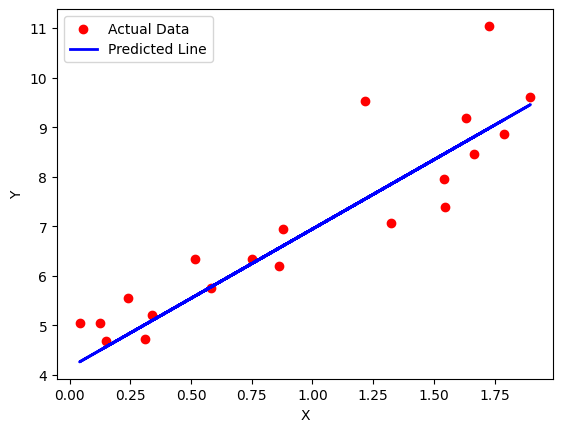

Intercept: 4.142913319458566
Coefficient: 2.7993236574802762


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generating synthetic data
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Making predictions
y_pred = model.predict(x_test)

# Plotting results
plt.scatter(x_test, y_test, color='red', label='Actual Data')
plt.plot(x_test, y_pred, color='blue', linewidth=2, label='Predicted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Printing model parameters
print(f'Intercept: {model.intercept_[0]}')
print(f'Coefficient: {model.coef_[0][0]}')


Mean Squared Error: 0.0
R-squared Score: 1.0
Intercept: 24999.999999999927
Coefficients: [ 5.00000000e+03  4.32479164e-12 -8.93067062e-12]


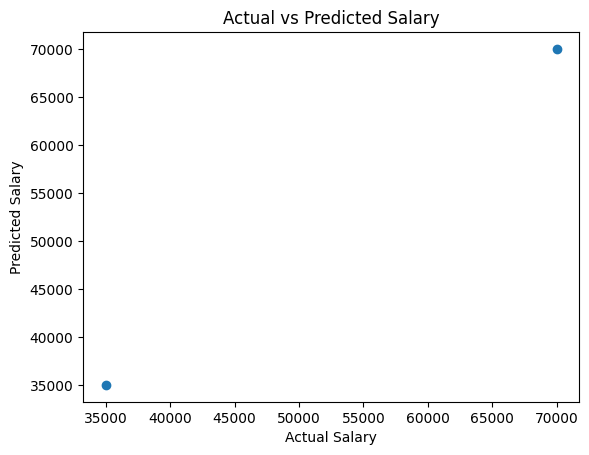

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample Dataset
data = {
    'Experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000],
    'Age': [22, 25, 28, 30, 33, 35, 38, 40, 43, 45],
    'Education': [1, 2, 2, 3, 3, 4, 4, 4, 5, 5]  # Education Level (1: High School, 5: PhD)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Independent Variables (X) and Dependent Variable (Y)
X = df[['Experience', 'Age', 'Education']]
Y = df['Salary']

# Splitting the Dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, Y_train)

# Predictions
Y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Visualizing Predicted vs Actual
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()


#Logistic

Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



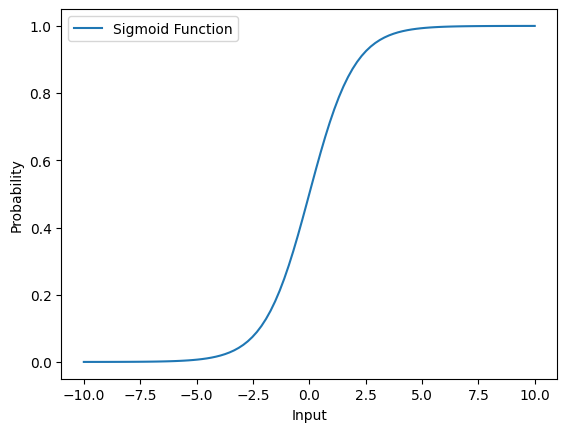

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (Example: Breast Cancer dataset)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Splitting dataset
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable (0 or 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualizing Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_vals = np.linspace(-10, 10, 100)
y_vals = sigmoid(x_vals)

plt.plot(x_vals, y_vals, label="Sigmoid Function")
plt.xlabel("Input")
plt.ylabel("Probability")
plt.legend()
plt.show()


#Decision Tree Regressor

Mean Squared Error: 900.00
R-squared Score: 0.89


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


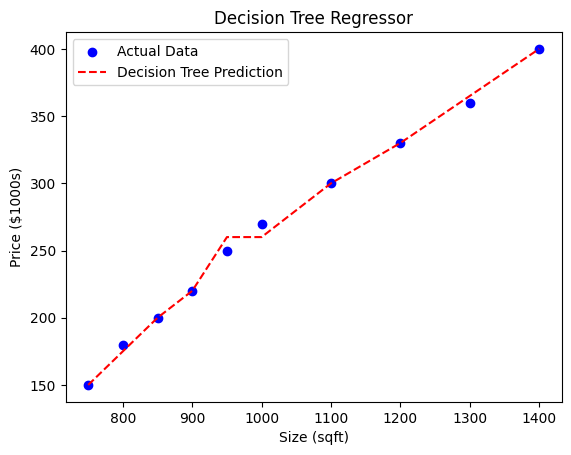

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Sample Dataset (House Price Prediction Example)
data = {
    'Size (sqft)': [750, 800, 850, 900, 950, 1000, 1100, 1200, 1300, 1400],
    'Price ($1000s)': [150, 180, 200, 220, 250, 270, 300, 330, 360, 400]
}

df = pd.DataFrame(data)

# Splitting features and target variable
X = df[['Size (sqft)']]
y = df['Price ($1000s)']

# Splitting into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Visualizing Decision Tree Predictions
X_sorted = np.sort(X_train, axis=0)  # Sorting for smooth plotting
y_sorted = regressor.predict(X_sorted)

plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X_sorted, y_sorted, color='red', linestyle='dashed', label="Decision Tree Prediction")
plt.xlabel("Size (sqft)")
plt.ylabel("Price ($1000s)")
plt.legend()
plt.title("Decision Tree Regressor")
plt.show()


#Decision Tree Claassifier

Model Accuracy: 1.00


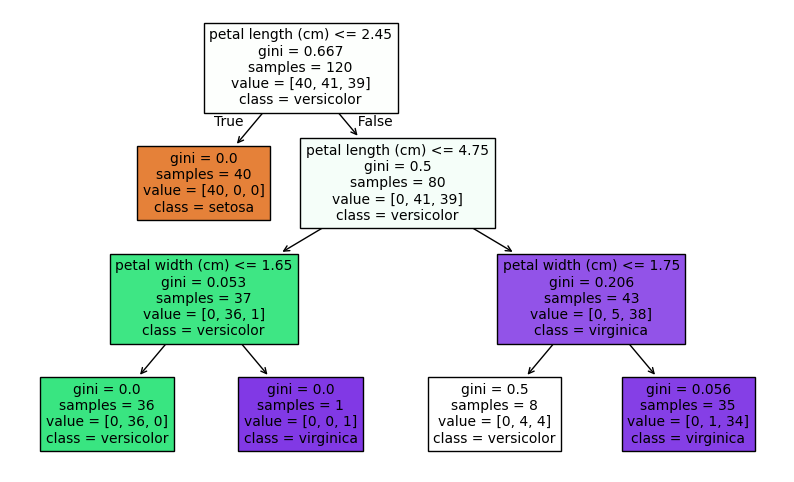

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Visualize the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


#Random Forest

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset (Example: Iris dataset)
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


#Naive Bayes

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Sample data
messages = ["Win a lottery now", "Congratulations! You won a free ticket",
            "Hello, how are you?", "Let's meet tomorrow",
            "Claim your prize now", "Have a great day"]

labels = [1, 1, 0, 0, 1, 0]  # 1: Spam, 0: Not Spam

# Convert text data into numerical vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(messages)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train the Naïve Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
predictions = model.predict(X_test)

# Print results
print("Predictions:", predictions)


Predictions: [1 0]


#SVC

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (Iris dataset for example)
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVC model
svc_model = SVC(kernel='linear', C=1.0)

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions
y_pred = svc_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#XGBoost

In [12]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
# Using the Iris dataset as an example
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'multi:softmax',  # For classification
    'num_class': 3,  # Number of classes in the target variable
    'max_depth': 3,
    'eta': 0.1,  # Learning rate
    'eval_metric': 'mlogloss'
}
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)
preds = model.predict(dtest)
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 1.0000
